In [1]:
from keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

2022-10-14 23:22:21.361680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-14 23:22:21.602248: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-14 23:22:21.602261: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-14 23:22:21.636319: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-14 23:22:22.396918: W tensorflow/stream_executor/platform/de

In [2]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [5]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [6]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-10-14 23:22:27.181764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 23:22:27.182210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-14 23:22:27.182367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-10-14 23:22:27.182477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-10-14 23:22:27.182582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




/home/spyros/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5432 - acc: 0.7795 - val_loss: 0.4203 - val_acc: 0.8656
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3325 - acc: 0.8959 - val_loss: 0.3218 - val_acc: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2382 - acc: 0.9242 - val_loss: 0.2853 - val_acc: 0.8902
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1867 - acc: 0.9400 - val_loss: 0.3006 - val_acc: 0.8782
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1518 - acc: 0.9500 - val_loss: 0.2875 - val_acc: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1283 - acc: 0.9595 - val_loss: 0.2878 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1039 - acc: 0.9691 - val_loss: 0.3044 - val_acc: 0.8834
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0884 - ac

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
# Compute average loss
summ = 0
for i in history_dict['loss']:
    summ += i
avg = summ / len(history_dict['loss'])

In [15]:
print(avg)

0.10684542756062002


In [16]:
# Compute average accuracy
summ = 0
for i in history_dict['acc']:
    summ +=i
avg =  summ / len(history_dict['acc'])

In [17]:
print(avg)

0.9655100047588349


In [18]:
# Compute average val_loss
summ = 0
for i in history_dict['val_loss']:
    summ += i
avg = summ / len(history_dict['val_loss'])

In [19]:
print(avg)

0.43116939514875413


In [20]:
# Compute average val_acc
summ = 0
for i in history_dict['val_acc']:
    summ += i
avg = summ / len(history_dict['val_acc'])

In [21]:
print(avg)

0.8745900005102157


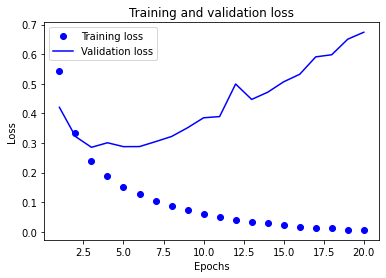

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Part 1: Compare the different compiler setups

- <font size='4'>Added one hidden layer</font>

In [23]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
from keras import optimizers
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




/home/spyros/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
from keras import losses
from keras import metrics

model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [27]:
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5592 - acc: 0.7447 - val_loss: 0.4250 - val_acc: 0.8468
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3224 - acc: 0.9002 - val_loss: 0.3178 - val_acc: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2222 - acc: 0.9284 - val_loss: 0.2960 - val_acc: 0.8800
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1725 - acc: 0.9412 - val_loss: 0.2845 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1296 - acc: 0.9595 - val_loss: 0.3864 - val_acc: 0.8580
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1067 - acc: 0.9670 - val_loss: 0.3271 - val_acc: 0.8792
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0877 - acc: 0.9724 - val_loss: 0.3608 - val_acc: 0.8743
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0698 - a

In [28]:
history_dict1 = history1.history

# Compute average loss 
summ = 0
for i in history_dict['loss']:
    summ += i
avg = summ / len(history_dict['loss'])

In [29]:
# Computer average val_loss
summ =0
avg = 0
for i in history_dict['val_loss']:
    summ +=i
avg = summ  / len(history_dict['val_loss'])

In [30]:
print(avg)

0.43116939514875413


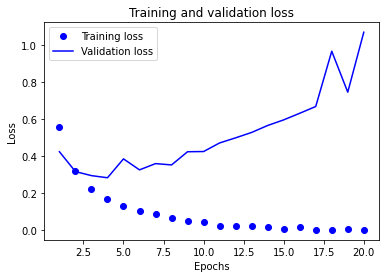

In [31]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

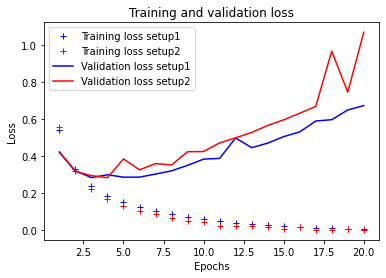

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict1 = history1.history
loss_values = history_dict['loss']
loss_values1 = history_dict1['loss']
val_loss_values = history_dict['val_loss']
val_loss_values1 = history_dict1['val_loss']
acc_values = history_dict['acc']
acc_values1 = history_dict1['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'b+', label='Training loss setup1')
plt.plot(epochs, loss_values1, 'r+', label='Training loss setup2')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss setup1')
plt.plot(epochs, val_loss_values1, 'r', label='Validation loss setup2')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

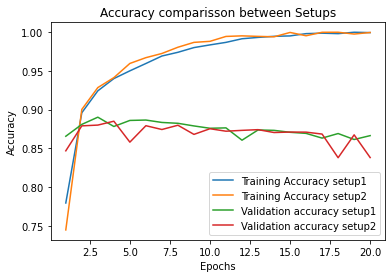

In [33]:
history_dict = history.history
history_dict1 = history1.history
accuracy = history_dict['acc']
accuracy1 = history_dict1['acc']
val_acc = history_dict['val_acc']
val_acc1 = history_dict1['val_acc']
epochs = range(1, len(val_acc)+1)
plt.plot(epochs, accuracy, label='Training Accuracy setup1')
plt.plot(epochs, accuracy1, label='Training Accuracy setup2')
plt.plot(epochs, val_acc, label= 'Validation accuracy setup1')
plt.plot(epochs, val_acc1, label= 'Validation accuracy setup2')
plt.title('Accuracy comparisson between Setups')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

<font size='4'>From the diagrams above we can see that until the 5th epoch validation loss is similar for both setups. However, after the 5th epoch the second setup with one more hidden layer has a higher loss on validation data. The training loss is very close for both training and validation data.  </font>


<br>

<br>

 - <font size='3'>Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.</font> 

Using 32 units

In [34]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
from keras import optimizers
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
from keras import losses
from keras import metrics

model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [38]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4919 - acc: 0.7809 - val_loss: 0.3516 - val_acc: 0.8692
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2675 - acc: 0.9098 - val_loss: 0.3259 - val_acc: 0.8634
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1979 - acc: 0.9331 - val_loss: 0.2778 - val_acc: 0.8903
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1496 - acc: 0.9489 - val_loss: 0.2980 - val_acc: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1251 - acc: 0.9569 - val_loss: 0.3023 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0999 - acc: 0.9667 - val_loss: 0.3219 - val_acc: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0820 - acc: 0.9731 - val_loss: 0.3575 - val_acc: 0.8792
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0637 - a

In [39]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
from keras import optimizers
model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
from keras import losses
from keras import metrics

model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [43]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4844 - acc: 0.7740 - val_loss: 0.3397 - val_acc: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2608 - acc: 0.9032 - val_loss: 0.2796 - val_acc: 0.8889
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1795 - acc: 0.9367 - val_loss: 0.3249 - val_acc: 0.8702
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1479 - acc: 0.9448 - val_loss: 0.3082 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1138 - acc: 0.9597 - val_loss: 0.3149 - val_acc: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0777 - acc: 0.9752 - val_loss: 0.3571 - val_acc: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0601 - acc: 0.9815 - val_loss: 0.3892 - val_acc: 0.8811
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0468 - a

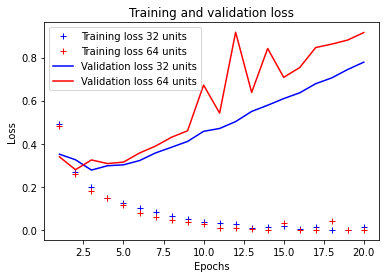

In [44]:
import matplotlib.pyplot as plt
history_dict2 = history2.history
history_dict3 = history3.history
loss_values2 = history_dict2['loss']
loss_values3 = history_dict3['loss']
val_loss_values2 = history_dict2['val_loss']
val_loss_values3 = history_dict3['val_loss']
acc_values2 = history_dict2['acc']
acc_values3 = history_dict3['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values2, 'b+', label='Training loss 32 units')
plt.plot(epochs, loss_values3, 'r+', label='Training loss 64 units')
plt.plot(epochs, val_loss_values2, 'b', label='Validation loss 32 units')
plt.plot(epochs, val_loss_values3, 'r', label='Validation loss 64 units')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

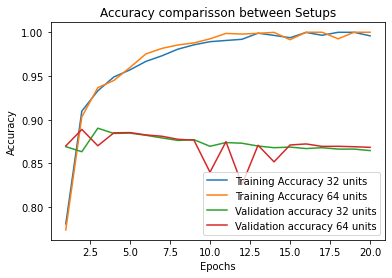

In [45]:
history_dict2 = history2.history
history_dict3 = history3.history
accuracy2 = history_dict2['acc']
accuracy3 = history_dict3['acc']
val_acc2 = history_dict2['val_acc']
val_acc3 = history_dict3['val_acc']
epochs = range(1, len(val_acc)+1)
plt.plot(epochs, accuracy2, label='Training Accuracy 32 units')
plt.plot(epochs, accuracy3, label='Training Accuracy 64 units')
plt.plot(epochs, val_acc2, label= 'Validation accuracy 32 units')
plt.plot(epochs, val_acc3, label= 'Validation accuracy 64 units')
plt.title('Accuracy comparisson between Setups')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

<font size='4'>From the first plot we can see that the Validation loss for 64 units is higher than the one for 32 units. The training loss is similar between the two different models.</font>

<font size='4'>From the second plot we can see that the training accuracy for both models are similar. When there are 64 units there are more fluctuating values than when there are 32 units. The validation accuracy follows a similar pattern. However, when there are 64 units it fluctuates more compared to 32 units.</font>

<br>

<br>

- Try using the mse loss function instead of binary_crossentropy

In [46]:
from keras import models
from keras import layers
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [48]:
from keras import optimizers
model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

In [49]:
from keras import losses
from keras import metrics

model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [50]:
model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1713 - acc: 0.7856 - val_loss: 0.1212 - val_acc: 0.8693
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0925 - acc: 0.9034 - val_loss: 0.0944 - val_acc: 0.8860
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0662 - acc: 0.9300 - val_loss: 0.0935 - val_acc: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0513 - acc: 0.9447 - val_loss: 0.0895 - val_acc: 0.8817
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0420 - acc: 0.9562 - val_loss: 0.0831 - val_acc: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0339 - acc: 0.9658 - val_loss: 0.0864 - val_acc: 0.8822
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0277 - acc: 0.9731 - val_loss: 0.0889 - val_acc: 0.8782
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0227 - a

In [51]:
history_dict4 = history4.history


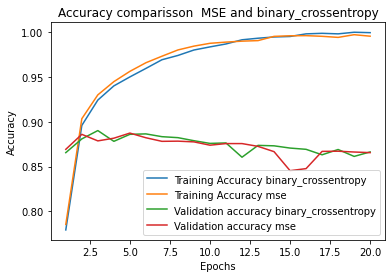

In [80]:
history_dict4 = history4.history
accuracy4 = history_dict4['acc']

val_acc4 = history_dict4['val_acc']
epochs = range(1, len(val_acc)+1)
plt.plot(epochs, accuracy, label='Training Accuracy binary_crossentropy')
plt.plot(epochs, accuracy4, label='Training Accuracy mse')
plt.plot(epochs, val_acc, label= 'Validation accuracy binary_crossentropy')
plt.plot(epochs, val_acc4, label= 'Validation accuracy mse')
plt.title('Accuracy comparisson  MSE and binary_crossentropy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

<font size='4'>From the plot above we can see that the Training Accuracy for both mse and binary_crossentropy are very close. However, the accuracy in validation data is different for mse and binary_crossentropy in the first 6 epochs. MSE starts with a lower validation accuracy than binary_crossentropy and on the 2nd epoch it has a lower accuracy than binary_crossentropy. After the 8th epoch both mse and binary_crossentropy show similar losses for training data. For validation data validation accuracy for mse get's lower. </font>



<br>

<br>

- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu. 

In [81]:
from keras import models
from keras import layers
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model5.add(layers.Dense(16, activation='tanh'))
model5.add(layers.Dense(1, activation='sigmoid'))

In [82]:
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
from keras import losses
from keras import metrics

model5.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [84]:
model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4910 - acc: 0.7925 - val_loss: 0.3558 - val_acc: 0.8762
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2760 - acc: 0.9073 - val_loss: 0.2823 - val_acc: 0.8916
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1898 - acc: 0.9359 - val_loss: 0.2705 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1462 - acc: 0.9498 - val_loss: 0.3177 - val_acc: 0.8758
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1103 - acc: 0.9626 - val_loss: 0.3155 - val_acc: 0.8815
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0871 - acc: 0.9724 - val_loss: 0.3464 - val_acc: 0.8784
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0685 - acc: 0.9781 - val_loss: 0.3930 - val_acc: 0.8765
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0578 - a

In [85]:
history_dict5 = history5.history

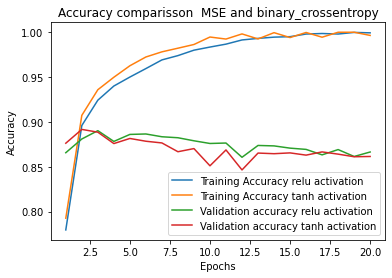

In [86]:

accuracy5 = history_dict5['acc']
val_acc5 = history_dict5['val_acc']
epochs = range(1, len(val_acc5)+1)
plt.plot(epochs, accuracy, label='Training Accuracy relu activation')
plt.plot(epochs, accuracy5, label='Training Accuracy tanh activation')
plt.plot(epochs, val_acc, label= 'Validation accuracy relu activation')
plt.plot(epochs, val_acc5, label= 'Validation accuracy tanh activation')
plt.title('Accuracy comparisson  MSE and binary_crossentropy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

<font size='4'>From the plot above we can see that from the 2nd to the 10th epoch Training accuracy with tanh is higher. As we get to the 20th epoch both tanh and relu end up to have approximately the same accuracy.</font>

<font size='4'>Validation accuracy with tanh is lower than relu, However, relu has more flactuations.</font>

# Part 2: Examine the impact of regularization and dropout

### Task 1: add the regularization

In [87]:
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [88]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [89]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [90]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

In [91]:
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [92]:
# define baseline model
def original_():
    # create model
    model = models.Sequential()
    model.add(layers.Dense(num_pixels, input_dim = num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Comile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [93]:
# define baseline model
def with_regularization():
    # create model
    network = models.Sequential()
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape=(28*28,)))
    network.add(layers.Dense(10, activation = 'softmax'))
    # Comile model
    network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return network

In [94]:
def with_dropout():
    # Create model
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(10, activation = 'softmax'))
    # Compile model 
    network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return network

In [95]:
# Original
original = original_()

original.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.5121 - accuracy: 0.8226 - val_loss: 0.4237 - val_accuracy: 0.8543 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.3682 - accuracy: 0.8699 - val_loss: 0.3797 - val_accuracy: 0.8652 - 1s/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.3270 - accuracy: 0.8826 - val_loss: 0.3642 - val_accuracy: 0.8707 - 1s/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.3049 - accuracy: 0.8888 - val_loss: 0.3389 - val_accuracy: 0.8768 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.2835 - accuracy: 0.8962 - val_loss: 0.3337 - val_accuracy: 0.8775 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.2674 - accuracy: 0.9021 - val_loss: 0.3342 - val_accuracy: 0.8765 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.2539 - accuracy: 0.9059 - val_loss: 0.3394 - val_accuracy: 0.8803 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.2452 - accuracy: 0.9092 - val_loss: 0.3196 - val_accuracy: 0.8877 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

In [96]:
# Final evaluation of the model original
scores = original.evaluate(x_test, y_test, verbose=0)
print(scores)

[0.31415224075317383, 0.8873000144958496]


In [97]:
original_error = (100-scores[1]*100)
print('Baseline Error Original: , %.2f%%' % original_error)

Baseline Error Original: , 11.27%


<br>

In [98]:
# With regularization
regularization = with_regularization()
regularization.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.8891 - accuracy: 0.8155 - val_loss: 0.6750 - val_accuracy: 0.8435 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.5965 - accuracy: 0.8537 - val_loss: 0.5622 - val_accuracy: 0.8485 - 950ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.5141 - accuracy: 0.8606 - val_loss: 0.5226 - val_accuracy: 0.8540 - 1s/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.4763 - accuracy: 0.8640 - val_loss: 0.4926 - val_accuracy: 0.8519 - 1s/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.4496 - accuracy: 0.8684 - val_loss: 0.4936 - val_accuracy: 0.8537 - 933ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.4357 - accuracy: 0.8716 - val_loss: 0.4587 - val_accuracy: 0.8656 - 828ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.4275 - accuracy: 0.8729 - val_loss: 0.4978 - val_accuracy: 0.8483 - 838ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.4169 - accuracy: 0.8755 - val_loss: 0.4690 - val_accuracy: 0.8557 - 991ms/epoch - 3ms/step
Epoch 9/1

In [99]:
# Final evaluation of the model with regularization
scores_regularization = regularization.evaluate(x_test, y_test, verbose=0)

In [100]:
regularization_error = (100-scores_regularization[1]*100)
print('Baseline Error Regularization: , %.2f%%' % regularization_error)

Baseline Error Regularization: , 13.65%


<br>

In [101]:
# With dropout
dropout = with_dropout()

In [102]:
dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 1s - loss: 0.6023 - accuracy: 0.7878 - val_loss: 0.4494 - val_accuracy: 0.8420 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.4333 - accuracy: 0.8458 - val_loss: 0.4086 - val_accuracy: 0.8547 - 875ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.3931 - accuracy: 0.8588 - val_loss: 0.3892 - val_accuracy: 0.8594 - 795ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.3690 - accuracy: 0.8653 - val_loss: 0.3698 - val_accuracy: 0.8670 - 828ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.3551 - accuracy: 0.8709 - val_loss: 0.3593 - val_accuracy: 0.8691 - 809ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.3427 - accuracy: 0.8745 - val_loss: 0.3555 - val_accuracy: 0.8694 - 805ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.3323 - accuracy: 0.8777 - val_loss: 0.3466 - val_accuracy: 0.8753 - 827ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3229 - accuracy: 0.8817 - val_loss: 0.3380 - val_accuracy: 0.8788 - 872ms/epoch - 3ms/step
Epo

In [103]:
# Final evaluation of the model with dropout
scores_dropout = dropout.evaluate(x_test, y_test, verbose=0)

In [104]:
dropout_error = (100-scores_dropout[1]*100)
print('Baseline Error Regularization: , %.2f%%' % dropout_error)

Baseline Error Regularization: , 11.85%


<br>

In [77]:
fig = plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<BarContainer object of 3 artists>

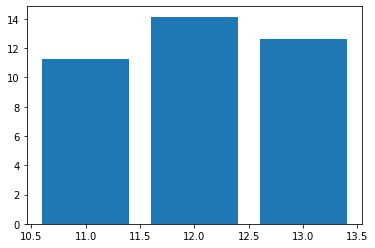

In [78]:
x = [original_error, regularization_error, dropout_error]
y = [11, 12, 13]
plt.bar(y,x)

#### The overfitting problem in the test data has been released however we get higher error as we can see on the plot above for regularization_error, and dropout_error